# do-it9 data 불러오기

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
(x_train_all,y_train_all),(x_test,y_test)=imdb.load_data(skip_top=20,num_words=100)

In [2]:
print(x_train_all.shape,y_train_all.shape)

(25000,) (25000,)


In [3]:
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [4]:
for i in range(len(x_train_all)):
    x_train_all[i]=[w for w in x_train_all[i]if w>2]
print(x_train_all[0])
    

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
word_to_index=imdb.get_word_index()
index_to_word={word_to_index[k]:k for k in word_to_index}
for w in x_train_all[0]:
    print(index_to_word[w-3],end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [6]:
print(len(x_train_all[0]),len(x_train_all[1]))

59 32


In [7]:
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [8]:
np.random.seed(42)
random_index=np.random.permutation(25000)
x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]

In [9]:
#sample data feature 길이 맞추기
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq=sequence.pad_sequences(x_train,maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val,maxlen=maxlen)

In [10]:
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [11]:
from tensorflow.keras.utils import to_categorical

x_train_onehot=to_categorical(x_train_seq)
x_val_onehot=to_categorical(x_val_seq)

In [12]:
print(x_train_onehot.shape)


(20000, 100, 100)


In [13]:
np.swapaxes(x_train_onehot,0,1).shape

(100, 20000, 100)

In [14]:
np.swapaxes(x_train_onehot,0,2).shape

(100, 100, 20000)

In [15]:
a=[1,2,3,4,5]
a[:-1][::-1]

[4, 3, 2, 1]

In [16]:
import tensorflow as tf

In [49]:
class RecurrentNetwork:
    def __init__(self,n_cells=10,batch_size=32,learning_rate=0.1):
        self.n_cells=n_cells
        self.batch_size=batch_size
        self.w1h=None
        self.w1x=None
        self.b1=None
        self.w2=None
        self.b2=None
        self.h=None
        self.losses=[]
        self.val_losses=[]
        self.lr=learning_rate
    def forpass(self,x):
        self.h=[np.zeros((x.shape[0],self.n_cells))]
        seq=np.swapaxes(x,0,1)
        for x in seq:
            z1=np.dot(x,self.w1x)+np.dot(self.h[-1],self.w1h)+self.b1
            h=np.tanh(z1)
            self.h.append(h)
            z2=np.dot(h,self.w2)+np.dot(self.h[-1],self.w1h)+self.b1
            h=np.tanh(z1)
            self.h.append(h)
            z2=np.dot(h,self.w2)+self.b2
        return z2
    def backprop(self,x,err):
        m=len(x)#샘플의 갯수
        w2_grad=np.dot(self.h[-1].T,err)/m
        b2_grad=np.sum(err)/m
        seq=np.swapaxes(x,0,1)
        
        w1h_grad=w1x_grad=b1_grad=0
        err_to_cell=np.dot(err,self.w2.T)*(1-self.h[-1]**2)
        
        for x,h in zip(seq[::-1][:10],self.h[:-1][::-1][:10]):
            w1h_grad+=np.dot(h.T,err_to_cell)
            w1x_grad+=np.dot(x.T,err_to_cell)
            b1_grad+=np.sum(err_to_cell,axis=0)
            err_to_cell=np.dot(err_to_cell,self.w1h)*(1-h**2)
            
        w1h_grad/=m
        w1x_grad/=m
        b1_grad/=m
        return w1h_grad,w1x_grad,b1_grad,w2_grad,b2_grad
    
    def sigmoid(self,z):
        a=1/(1+np.exp(-z))
        return a
    
    def init_weights(self,n_features,n_classes):
        orth_init=tf.initializers.Orthogonal()
        glorot_init=tf.initializers.GlorotUniform()
        self.w1h=orth_init((self.n_cells,self.n_cells)).numpy()
        self.w1x=glorot_init((n_features,self.n_cells)).numpy()
        self.b1=np.zeros(self.n_cells)
        self.w2=glorot_init((self.n_cells,n_classes)).numpy()
        self.b2=np.zeros(n_classes)
        
    def fit(self,x,y,epochs=100,x_val=None,y_val=None):
        y=y.reshape(-1,1)
        y_val=y_val.reshape(-1,1)
        np.random.seed(42)
        self.init_weights(x.shape[2],y.shape[1])
        for i in range(epochs):
            print('에포크',i,end='')
            batch_losses=[]
            for x_batch, y_batch in self.gen_batch(x,y):
                print('.',end='')
                a=self.training(x_batch,y_batch)
                a=np.clip(a,1e-10,1-1e-10)
                loss=np.mean(-(y_batch*np.log(a)+(1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            self.update_val_loss(x_val,y_val)
    def gen_batch(self,x,y):
        length=len(x)
        bins=length//self.batch_size
        indexes=np.random.permutation(np.arange(len(x)))
        x=x[indexes]
        y=y[indexes]
        for i in range(bins):
            start=self.batch_size*i
            end=self.batch_size*(i+1)
            yield x[start:end], y[start:end]
    def training(self,x,y):
        m=len(x)
        z=self.forpass(x)
        a=self.sigmoid(z)
        err=-(y-a)
        w1h_grad,w1x_grad,b1_grad,w2_grad,b2_grad=self.backprop(x,err)
        self.w1h-=self.lr*w1h_grad
        self.w1x-=self.lr*w1x_grad
        self.b1-=self.lr*b1_grad
        self.w2-=self.lr*w2_grad
        self.b2-=self.lr*b2_grad
        return a
    def predict(self,x):
        z=self.forpass(x)
        return z>0
    def score(self,x,y):
        return np.mean(self.predict(x)==y.reshape(-1,1))
    def update_val_loss(self,x_val,y_val):
        z=self.forpass(x_val)
        a=self.sigmoid(z)
        a=np.clip(a,1e-10,1-1e-10)
        val_loss=np.mean(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [50]:
rn=RecurrentNetwork(n_cells=32,batch_size=32,learning_rate=0.01)
rn.fit(x_train_onehot,y_train,epochs=20,x_val=x_val_onehot,y_val=y_val)

에포크 0.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1............................................................................................................................................................................................................................................................................................................................................................................

에포크 12.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 13..........................................................................................................................................................................................................................................................................................................................................................................

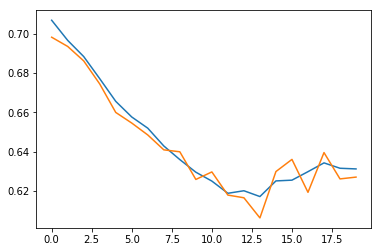

In [51]:
import matplotlib.pyplot as plt
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [52]:
rn.score(x_val_onehot,y_val)

0.6446

# 9-3 텐서플로로 순환 신경망 만들기

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [56]:
model=Sequential()
model.add(SimpleRNN(32,input_shape=(100,100)))
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train_onehot,y_train,epochs=20,batch_size=32,validation_data=(x_val_onehot,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 27s 1ms/sample - loss: 0.6994 - accuracy: 0.5210 - val_loss: 0.6924 - val_accuracy: 0.5324
Epoch 2/20
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.6792 - accuracy: 0.5696 - val_loss: 0.6673 - val_accuracy: 0.6012
Epoch 3/20
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.6527 - accuracy: 0.6169 - val_loss: 0.6366 - val_accuracy: 0.6296
Epoch 4/20
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.6306 - accuracy: 0.6492 - val_loss: 0.7949 - val_accuracy: 0.5114
Epoch 5/20
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.6158 - accuracy: 0.6632 - val_loss: 0.6061 - val_accuracy: 0.6726
Epoch 6/20
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.6064 - accuracy: 0.6758 - val_loss: 0.6173 - val_accuracy: 0.6550
Epoch 7/20
20000/20000 [==============================] -

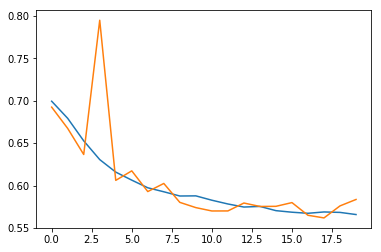

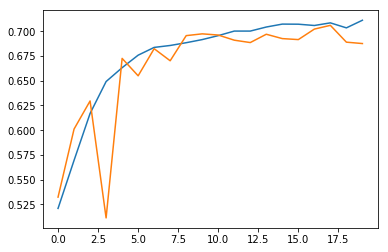

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [59]:
loss,accuracy=model.evaluate(x_val_onehot,y_val,verbose=0)

In [60]:
#embeding

In [61]:
from tensorflow.keras.layers import Embedding

In [64]:
from tensorflow.keras.datasets import imdb
(x_train_all,y_train_all),(x_test,y_test)=imdb.load_data(skip_top=20,num_words=1000)
for i in range(len(x_train_all)):
    x_train_all[i]=[w for w in x_train_all[i]if w>2 ]
x_train=x_train_all[random_index[:20000]]
y_train=y_train_all[random_index[:20000]]
x_val=x_train_all[random_index[20000:]]
y_val=y_train_all[random_index[20000:]]

In [65]:
maxlen=100
x_train_seq=sequence.pad_sequences(x_train,maxlen=maxlen)
x_val_seq=sequence.pad_sequences(x_val,maxlen=maxlen)

In [66]:
model_ebd=Sequential()
model_ebd.add(Embedding(1000,32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1,activation='sigmoid'))
model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


modle

In [67]:
model_ebd.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_ebd.fit(x_train_seq,y_train,epochs=10,batch_size=32,validation_data=(x_val_seq,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.5142 - accuracy: 0.7477 - val_loss: 0.4442 - val_accuracy: 0.8064
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3947 - accuracy: 0.8328 - val_loss: 0.4738 - val_accuracy: 0.7814
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3769 - accuracy: 0.8399 - val_loss: 0.4335 - val_accuracy: 0.8094
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3582 - accuracy: 0.8500 - val_loss: 0.4065 - val_accuracy: 0.8188
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3702 - accuracy: 0.8467 - val_loss: 0.4227 - val_accuracy: 0.8188
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.3247 - accuracy: 0.8722 - val_loss: 0.4285 - val_accuracy: 0.8186
Epoch 7/10
20000/20000 [==============================] -

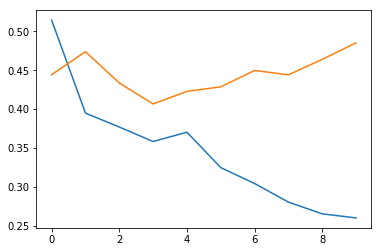

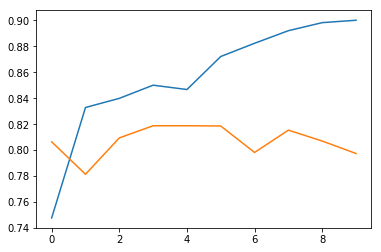

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [69]:
#9-4 LSTM 순환 신경망 만들어 텍스트 분류

In [71]:
from tensorflow.keras.layers import LSTM
model_lstm=Sequential()
model_lstm.add(Embedding(1000,32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_lstm.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model_lstm.fit(x_train_seq,y_train,epochs=10,batch_size=32,validation_data=(x_val_seq,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 39s 2ms/sample - loss: 0.4543 - accuracy: 0.7997 - val_loss: 0.3701 - val_accuracy: 0.8442
Epoch 2/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.3338 - accuracy: 0.8600 - val_loss: 0.3659 - val_accuracy: 0.8438
Epoch 3/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.3062 - accuracy: 0.8716 - val_loss: 0.3555 - val_accuracy: 0.8458
Epoch 4/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.2886 - accuracy: 0.8795 - val_loss: 0.3849 - val_accuracy: 0.8332
Epoch 5/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.2759 - accuracy: 0.8834 - val_loss: 0.3671 - val_accuracy: 0.8428
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/sample - loss: 0.2621 - accuracy: 0.8918 - val_loss: 0.3860 - val_accuracy: 0.8396
Epoch 7/10
20000/20000 [==============================] -

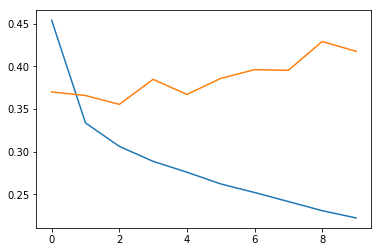

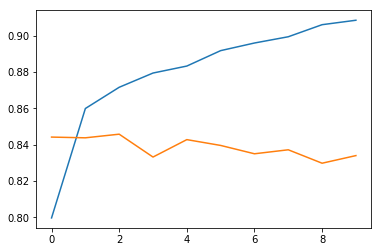

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()